# Executing IBM Quantum system

**Instructor** : Hwajung Kang, Ph.D., Education Delivery Program Manager, IBM Quantum

In [11]:
from qiskit import *
from qiskit.visualization import plot_distribution, plot_error_map
from qiskit.quantum_info import hellinger_fidelity

from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider

**Q. Simulate the following 4 qubit GHZ circuit using `AerSimulator` and plot the result using `plot_distribution`.**

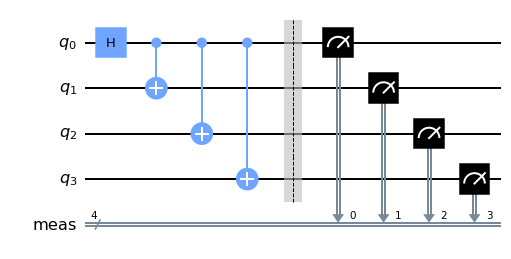

In [3]:
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, range(1, 4))
qc.measure_all()
qc.draw('mpl')

In [1]:
## your code goes here.






Run the following cells to access `ibmq_quito`, the 5 qubit quantum system.  

In [8]:
prov = IBMProvider()

In [9]:
backendT = prov.get_backend('ibmq_quito')

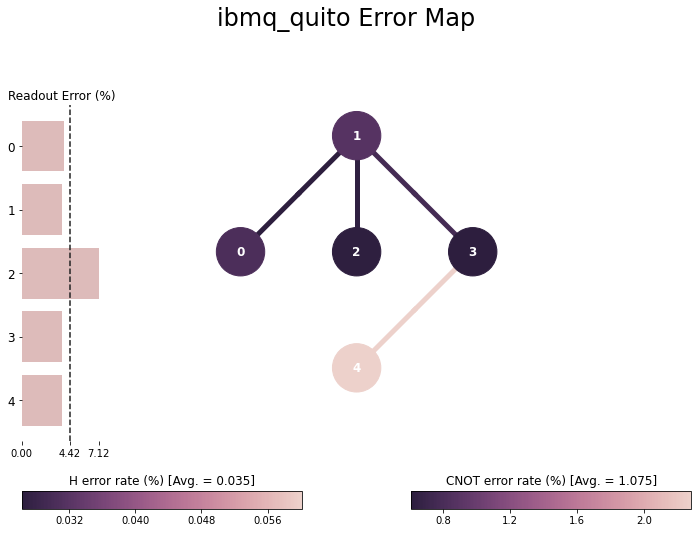

In [10]:
plot_error_map(backendT)

Upon running the cell below, you will get the information about the backend `ibmq_quito`.

You can also learn about `ibm_quito` [here](https://quantum-computing.ibm.com/services?services=systems&system=ibmq_quito).

## Qiskit Transpiler

**Transpiler steps**

1. Express circuit in the native gate sets of a backend: ['id', 'rz', 'sx', 'x', 'cx', 'reset'] (identical across the most of the hardwares) 
2. Initial layout (using different algorithms and objectives depending on the optimization level)
3. SWAP routing - make the circuit compatible with the coupling map


4. Optimize 1 qubit and 2 qubit gates (using differnt level of algorithms depending on the optimization level)
5. Remapping the circuit to a low noise subgraph (Mapomatic - [paper](https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.4.010327))

### Understand transpiled circuit

The following cell is to transpile `qc` for the `backendT`.
Execute the cell below several times. **Do you get identical transpiled circuit all the time?**

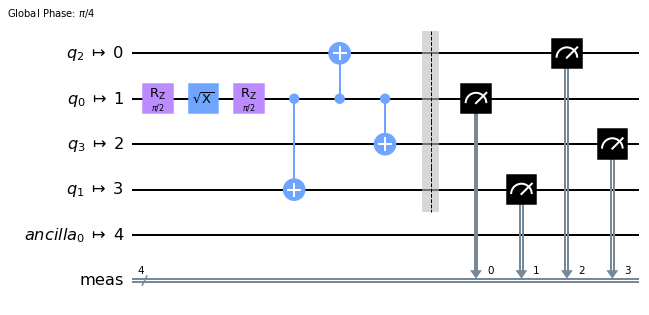

In [19]:
qc_transT = transpile(qc, backendT)
qc_transT.draw('mpl')

**Q. Compare the number of qubits and number of CNOT gates in the circuits `qc` and `qc_transT`. Discuss the reasons for the difference.**

In [2]:
## your answer



**Q. Which physical qubits are mapped to which virtual qubits initially and finally?**

In [ ]:
## your answer
# List of physical qubits mapped to the virtual qubits [0, 1, 2, 3]
Initial_layout = [] 
Final_mapping = []

**Q. Set the initial layout manually to understand how it impacts the transpiled result.**

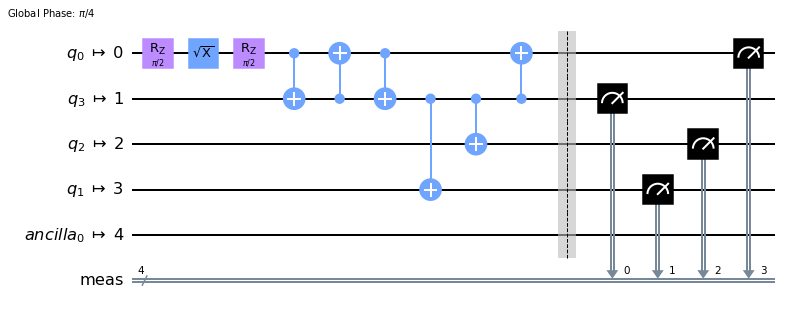

In [12]:
# example
qc_transT = transpile(qc, backendT, initial_layout=[0, 3, 2, 1])
qc_transT.draw('mpl')

### Optimization levels

Execute the cell below.

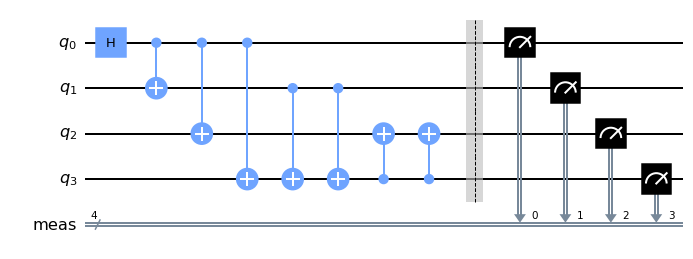

In [46]:
qc_silly = QuantumCircuit(4)
qc_silly.h(0)
qc_silly.cx(0, range(1, 4))
qc_silly.cx([1]*2, [3]*2)
qc_silly.cx([3]*2, [2]*2)
qc_silly.measure_all()

qc_silly.draw('mpl')

**Q. Transpile the circuit `qc_silly` for the `backendT` setting the parameter `optimization_level` from 0 to 3. Discuss the differences.**

In [3]:
## your code goes here. 












   **Q. Execute two transpiled circuits, one with optimization level 1 and the other with level 3, on backendT. Plot the result using `plot_distribution`.**

In [4]:
## your code goes here.




**Q. Compare the result fidelities using `hellinger_fidelity`.**

In [ ]:
## your code goes here.





### Different topology

Run the following cell to set `backendL`.

In [50]:
backendL = prov.get_backend('ibmq_manila')

Check the `backendL` information using `plot_error_map` or [here](https://quantum-computing.ibm.com/services?services=systems&system=ibmq_manila).  

**Compare the topology of `quito` and `manila`.**

**Q. Transpile the circuit `qc` for `backendT` and `backendL`. Compare the number of cnot gates in the transpiled circuits.** 

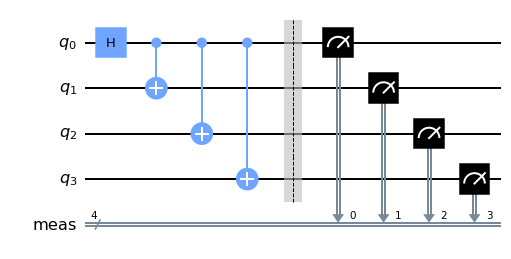

In [52]:
qc.draw('mpl')

In [5]:
## your code/answer











**Q. Which physical qubits are mapped to which virtual qubits initially and finally?**

In [ ]:
## your answer
# List of physical qubits mapped to the virtual qubits [0, 1, 2, 3]

# For backendT
Initial_layout = [] 
Final_mapping = []


# For backendL
Initial_layout = [] 
Final_mapping = []

**Q. Execute the each transpiled circuit on their corresponding quantum systems, `backendT` and `backendL`, respectively. Compare the fidelity of the results.**

In [6]:
## your code goes here















### Being Smart

**Q. Consider the 5 qubit GHZ state, $\frac{1}{\sqrt{2}}(|00000\rangle + |11111\rangle)$.
 Build a quantum circuit producing the 5Q GHZ state that is optimal for the topology of the backend, `ibmq_kolkata`, .e.g. minimize the transpiled circuit depth..**

In [7]:
## your code goes here













In [1]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright